# Project: Lending Club Case Study

## 1. Problem Statement:
> Need to identify the driving factor for loan getting defaulted which company can use it for portfolio and risk management
***
## About Dataset
The Dataset provided has two set of attributes i.e Consumer Attributes and Loan Attributes that influence the tendency of loan default.
1. **Consumer Attributes**:
    1. **Annual Income (annual_inc)**: Low income likelihood of default.
    2. **Debt-to-Income Ratio (dti)**: A higher DTI indicates large portion of income is committed to debt payment, increasing default risk
    3. **Employment Lenght (emp_length)**: Longer employment indicate financial stablity, and thus reducing the risk of default
    4. **Verification Status (verification_status)**: Verified income and employment may lower the likelihood of default.
    5. **Home Ownership (home_ownership)**: Borrowers who own a home might have a lower tendency to default compared to renters.
    6. **Delinquency History (delinq_2yrs)**: A history of recent delinquencies is a strong predictor of future default behavior.
    7. **State (addr_state)**: Economic conditions in specific states might influence the default rate.
2. **Loan Attributes**:
    1. **Loan Amount (loan_amnt)**: Larger loan amounts might lead to a higher probability of default due to higher repayment burdens.
    2. **Term (term)**: Longer loan terms might result in a higher likelihood of default as borrowers are committed for a longer period.
    3. **Interest Rate (int_rate)**: Higher interest rates increase repayment obligations, leading to a higher risk of default.
    4. **Installment (installment)**: Larger monthly installments might strain the borrower's budget, increasing the risk.
    5. **Grade and Subgrade (grade, sub_grade)**: Lower grades (indicating higher credit risk) are directly associated with a higher likelihood of default.
    6. **Loan Purpose (purpose)**: Loans for discretionary purposes (e.g., vacations, weddings) might have a higher likelihood of default compared to necessary expenditures (e.g., debt consolidation).
    7. **Loan Status (loan_status)**: A longer credit history generally correlates with a lower risk of default.   
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#set default plot theme
plt.style.use('ggplot')

In [2]:
loan_dataset = pd.read_csv(r"C:\Users\chida\OneDrive\Documents\IIITB-AI&ML\Module8-LendingClubCaseStudy\loan\loan.csv", dtype=object);

In [3]:
#check for null value columns
pd.set_option("display.max_rows", None)
loan_dataset.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### STEP #1: Dataset cleaning
1. Delete unnecessary columns
2. Remove column with more than 30% of values are null
3. Remove row having more than 2 null values
4. Impute null values
5. Standardise Values
   1. Format or scale if required
   2. Filter Rows & Columns
   3. Depulicate (Remove duplicate row if any)

#### STEP #2: Univariate Analysis
6. Univariate Analysis
   1. Quantative Variable : Plot box plot and remove outlier if any
   2. Categorical Variable: Plot histogram and check for the distribution trend

#### STEP #3: Derived Column
7. Derived column: create new columns based on bins for column int_rate, loan_amount, annual_income and dti

#### STEP #4: Bivariate Analysis
8.  Bivariate Analysis
    1. Aganist Loan_status
    2. B/w non loan_status columns

#### STEP #5: Multivariate analysis
10. Multivariate analysis

#### STEP #6: Observation Summary & Recommendation

In [4]:
# Consider columns that are under consideration (for this scope of problem)
loan_df = loan_dataset[['id','member_id','annual_inc','dti','emp_length','verification_status','home_ownership','delinq_2yrs','addr_state','loan_amnt','term','int_rate','installment','grade','sub_grade','purpose','loan_status']]

In [5]:
loan_df.shape

(39717, 17)

In [6]:
loan_df.isnull().sum()

id                        0
member_id                 0
annual_inc                0
dti                       0
emp_length             1075
verification_status       0
home_ownership            0
delinq_2yrs               0
addr_state                0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
purpose                   0
loan_status               0
dtype: int64

In [7]:
#From above output, we can see that emp_length has 1075 null values.
loan_df[loan_df['emp_length'].isnull()].count()

id                     1075
member_id              1075
annual_inc             1075
dti                    1075
emp_length                0
verification_status    1075
home_ownership         1075
delinq_2yrs            1075
addr_state             1075
loan_amnt              1075
term                   1075
int_rate               1075
installment            1075
grade                  1075
sub_grade              1075
purpose                1075
loan_status            1075
dtype: int64

In [8]:
#From above output, we can see that loan record that some of the emp length having (null) are also marked as Charged Off (default)
#Lets not remove then and instead, replace with 0 years
loan_df['emp_length'].fillna('0 years',inplace=True,axis=0)

In [9]:
#Lets check again the total null values present across all the columns
loan_df.isnull().sum()

id                     0
member_id              0
annual_inc             0
dti                    0
emp_length             0
verification_status    0
home_ownership         0
delinq_2yrs            0
addr_state             0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
purpose                0
loan_status            0
dtype: int64

In [10]:
# Standardise Values
loan_df.head(5)

,id,member_id,annual_inc,dti,emp_length,verification_status,home_ownership,delinq_2yrs,addr_state,loan_amnt,term,int_rate,installment,grade,sub_grade,purpose,loan_status
0,1077501,1296599,24000,27.65,10+ years,Verified,RENT,0,AZ,5000,36 months,10.65%,162.87,B,B2,credit_card,Fully Paid
1,1077430,1314167,30000,1,< 1 year,Source Verified,RENT,0,GA,2500,60 months,15.27%,59.83,C,C4,car,Charged Off
2,1077175,1313524,12252,8.72,10+ years,Not Verified,RENT,0,IL,2400,36 months,15.96%,84.33,C,C5,small_business,Fully Paid
3,1076863,1277178,49200,20,10+ years,Source Verified,RENT,0,CA,10000,36 months,13.49%,339.31,C,C1,other,Fully Paid
4,1075358,1311748,80000,17.94,1 year,Source Verified,RENT,0,OR,3000,60 months,12.69%,67.79,B,B5,other,Current


**From above output, we can perform the following:**
1. emp_lenght, can we converted into int type by removing the 'year' word
2. term, can be converted into int type by removing the 'months' word
3. int_rate, can be converted into int type by removing the '%' symbol for it.
4. verification_status, replace Verified, Source Verified and Not Verified with 0, 1, 2 respectively
5. home_ownership, replace RENT, MORTGAGE, OWN, OTHER, NONE with , 0,1,2,3,4 respectively
6. grade, replace grade A, B, C, D, E, F, G with 0, 1, 2, 3, 4, 5, 6 respectively
7. loan_status, replace Fully Paid, Charged Off, Current with 0, 1, 2 respectively

In [11]:
#Normalize emp length
def convert_emp_length(empLenght):
    emp_arr = empLenght.split(' ')
    if("<" in emp_arr[0]):
        result = 1
    elif ("+" in emp_arr[0]):
        result = 10
    else:
        result = emp_arr[0]
    return result;

loan_df['emp_length_norm'] = loan_df.emp_length.apply(convert_emp_length)
loan_df['emp_length_norm'] = loan_df['emp_length_norm'].astype('int32')

In [12]:
#Noramlize term column value
loan_df['term_norm'] = loan_df['term'].apply(lambda x: x.strip()[0:2])
loan_df['term_norm'] = loan_df['term_norm'].astype('int32')

In [13]:
#Normalize int_rate column
loan_df['int_rate_norm'] = loan_df['int_rate'].str.strip().apply(lambda x: x[:-1])
loan_df['int_rate_norm'] = loan_df['int_rate_norm'].astype('float64')

In [14]:
#verification_status, replace Verified, Source Verified and Not Verified with 0, 1, 2 respectively
def convert_verification_status(status):
    if (status=='Verified'):
        result = 0
    elif (status=='Source Verified'):
        result = 1
    else:
        result = 2
    return result
loan_df['verification_status_norm'] = loan_df['verification_status'].apply(convert_verification_status)

In [15]:
#home_ownership, replace RENT, MORTGAGE, OWN, OTHER, NONE with , 0,1,2,3,4 respectively
def convert_home_ownership(home_type):
    if (home_type=='RENT'):
        result = 0
    elif (home_type=='MORTGAGE'):
        result = 1
    elif (home_type=='OWN'):
        result = 2
    elif (home_type=='OTHER'):
        result = 3
    else:
        result = 4
    return result
loan_df['home_ownership_norm'] = loan_df['home_ownership'].apply(convert_home_ownership)

In [16]:
#grade, replace grade A, B, C, D, E, F, G with 0, 1, 2, 3, 4, 5, 6 respectively
def convert_grade(grade_type):
    if (grade_type=='A'):
        result = 0
    elif (grade_type=='B'):
        result = 1
    elif (grade_type=='C'):
        result = 2
    elif (grade_type=='D'):
        result = 3
    elif (grade_type=='E'):
        result = 4
    elif (grade_type=='F'):
        result = 5
    else:
        result = 6
    return result
loan_df['grade_norm'] = loan_df['grade'].apply(convert_grade)

In [17]:
#loan_status, replace Fully Paid, Charged Off, Current with 0, 1, 2 respectively
def convert_loan_status(loan_status):
    if (loan_status=='Fully Paid'):
        result = 0
    elif (loan_status=='Charged Off'):
        result = 1
    else:
        result = 2
    return result
loan_df['loan_status_norm'] = loan_df['loan_status'].apply(convert_loan_status)

**Check for duplicate row. If any, drop them**

In [18]:
print(loan_df.shape)
print(loan_df.duplicated(subset=None, keep='first').count())

(39717, 24)
39717


In [19]:
#No duplicate row found.

#### Filter Row and Columns
1. Remove unnessary columns
2. Remove rows that are not relevant for our analysis, ie remove row with loan_status as **'Current'**

In [20]:
loan_df.head(2)

,id,member_id,annual_inc,dti,emp_length,verification_status,home_ownership,delinq_2yrs,addr_state,loan_amnt,...,sub_grade,purpose,loan_status,emp_length_norm,term_norm,int_rate_norm,verification_status_norm,home_ownership_norm,grade_norm,loan_status_norm
0,1077501,1296599,24000,27.65,10+ years,Verified,RENT,0,AZ,5000,...,B2,credit_card,Fully Paid,10,36,10.65,0,0,1,0
1,1077430,1314167,30000,1,< 1 year,Source Verified,RENT,0,GA,2500,...,C4,car,Charged Off,1,60,15.27,1,0,2,1


##### At this stage we have normalized all ordered categorical column to quantative variable that will be used to plot correlation b/w these variable.
##### No column required to drop
##### But we need to **filter data excluding current** running loan as we need to perform predective outcome on these current running loan based on the past data i,e Fully Paid and Charged Off

In [21]:
loan_subset = loan_df[~(loan_df['loan_status']=='Current')]
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38577 non-null  object 
 1   member_id                 38577 non-null  object 
 2   annual_inc                38577 non-null  object 
 3   dti                       38577 non-null  object 
 4   emp_length                38577 non-null  object 
 5   verification_status       38577 non-null  object 
 6   home_ownership            38577 non-null  object 
 7   delinq_2yrs               38577 non-null  object 
 8   addr_state                38577 non-null  object 
 9   loan_amnt                 38577 non-null  object 
 10  term                      38577 non-null  object 
 11  int_rate                  38577 non-null  object 
 12  installment               38577 non-null  object 
 13  grade                     38577 non-null  object 
 14  sub_grade  

In [22]:
#Convert categorical variable columns to quantative variable column
numeric_column = ['annual_inc','dti','delinq_2yrs','loan_amnt','installment']
loan_subset[numeric_column] = loan_subset[numeric_column].apply(pd.to_numeric)
loan_subset.reset_index()
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38577 non-null  object 
 1   member_id                 38577 non-null  object 
 2   annual_inc                38577 non-null  float64
 3   dti                       38577 non-null  float64
 4   emp_length                38577 non-null  object 
 5   verification_status       38577 non-null  object 
 6   home_ownership            38577 non-null  object 
 7   delinq_2yrs               38577 non-null  int64  
 8   addr_state                38577 non-null  object 
 9   loan_amnt                 38577 non-null  int64  
 10  term                      38577 non-null  object 
 11  int_rate                  38577 non-null  object 
 12  installment               38577 non-null  float64
 13  grade                     38577 non-null  object 
 14  sub_grade  

#### 6. Univariate Analysis
   1. Quantative Variable : Plot box plot and remove outlier if any
> **column** loan_amnt, dti, delinq_2yrs, loan_amnt, installment
   3. Categorical Variable: Plot histogram and check for the distribution trend
> **column** purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status             

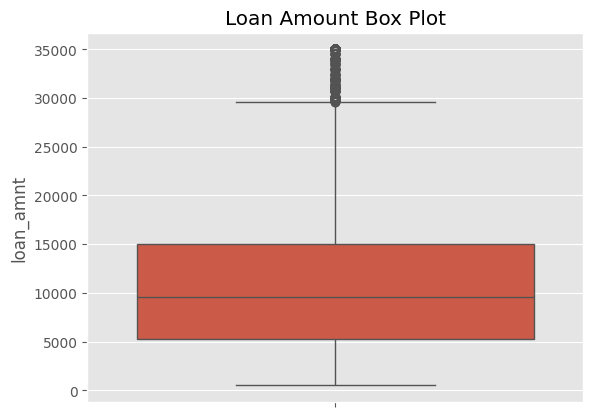

In [23]:

sns.boxplot(loan_subset.loan_amnt)
plt.title("Loan Amount Box Plot")
plt.show()

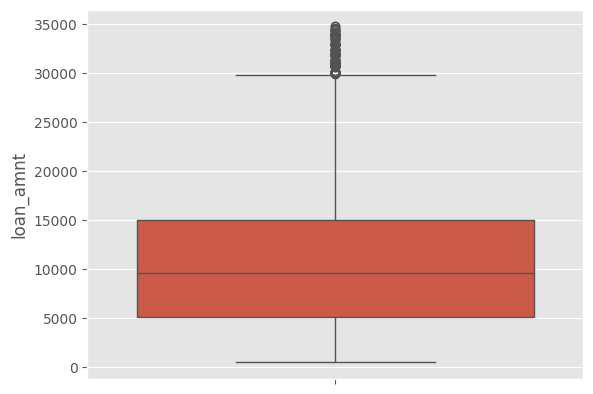

In [24]:
#Remove loan_amnt outlier by considering all within .99 percentile of the values
loan_subset = loan_subset[loan_subset['loan_amnt']<loan_subset['loan_amnt'].quantile(0.99)]
sns.boxplot(loan_subset.loan_amnt)
plt.show()

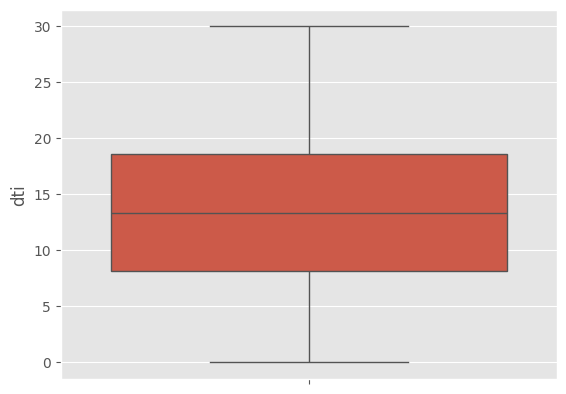

In [25]:
sns.boxplot(loan_subset.dti)
plt.show()

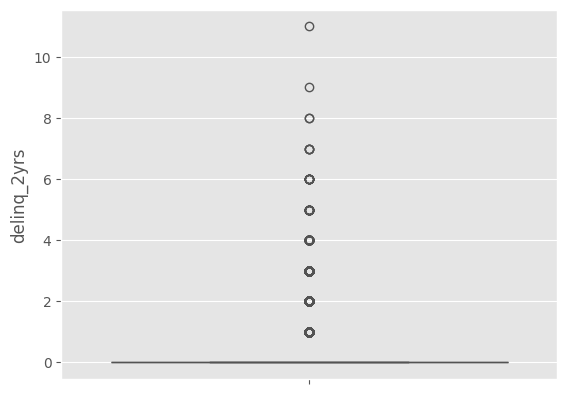

In [26]:
sns.boxplot(loan_subset.delinq_2yrs)
plt.show()
#Here most of the values falls after upper fence 
#but this variable contains curical data about the loan applicant past history of default. 
#So we will retain them all

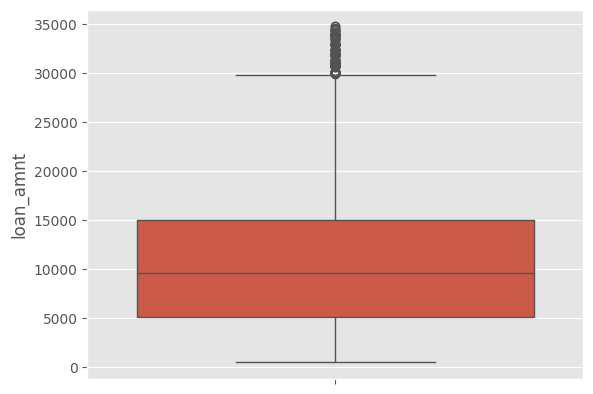

In [27]:
sns.boxplot(loan_subset.loan_amnt)
plt.show()

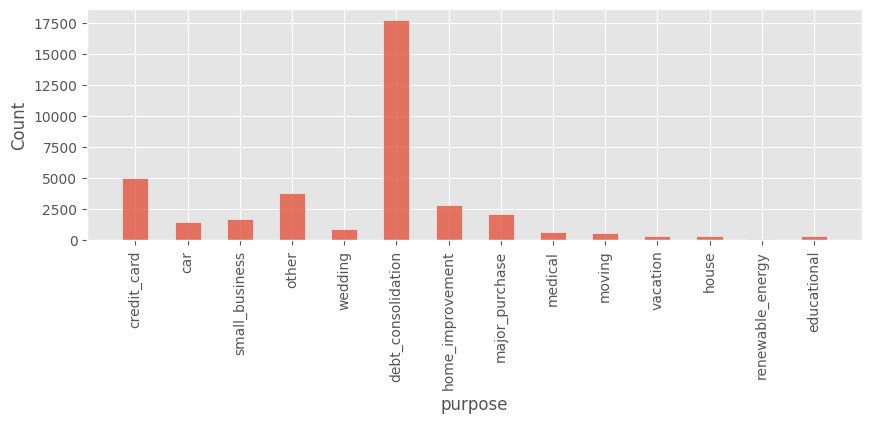

In [28]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(10,3))
chart = sns.histplot(loan_subset['purpose'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

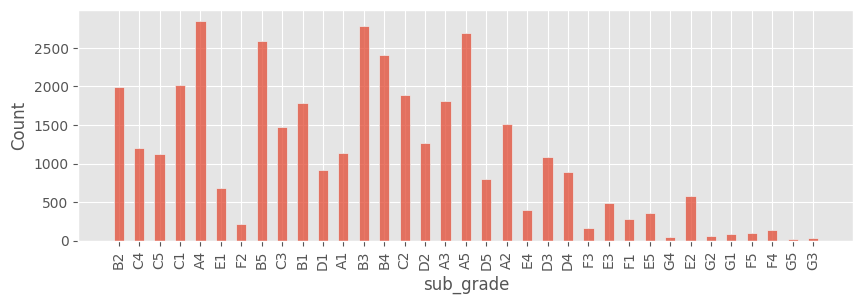

In [29]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(10,3))
chart = sns.histplot(loan_subset['sub_grade'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

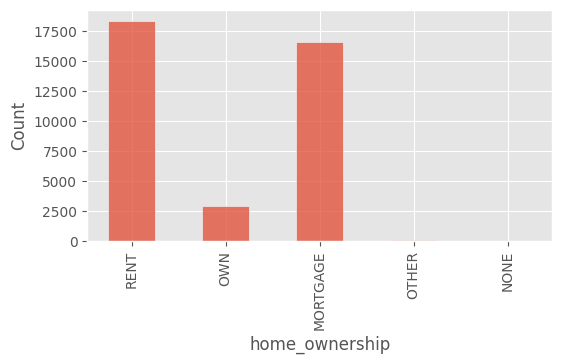

In [30]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(6,3))
chart = sns.histplot(loan_subset['home_ownership'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

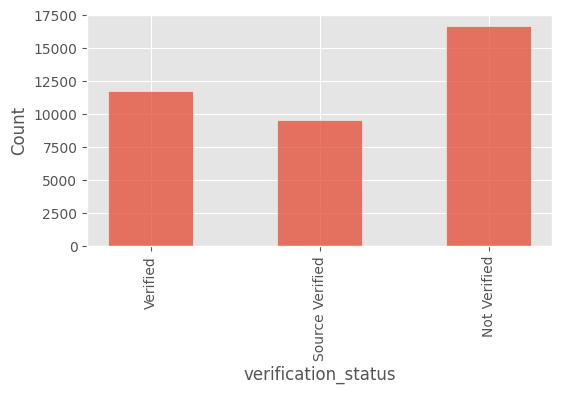

In [31]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(6,3))
chart = sns.histplot(loan_subset['verification_status'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

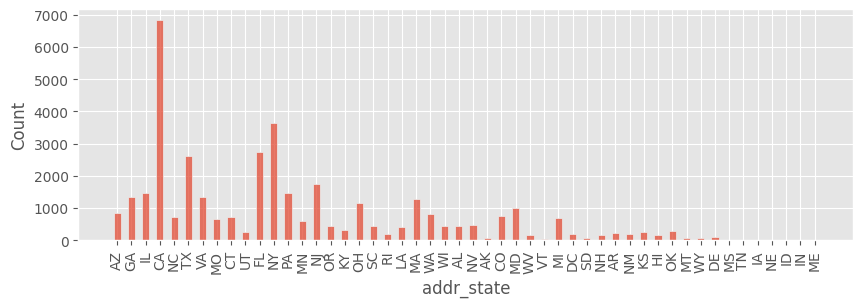

In [32]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(10,3))
chart = sns.histplot(loan_subset['addr_state'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

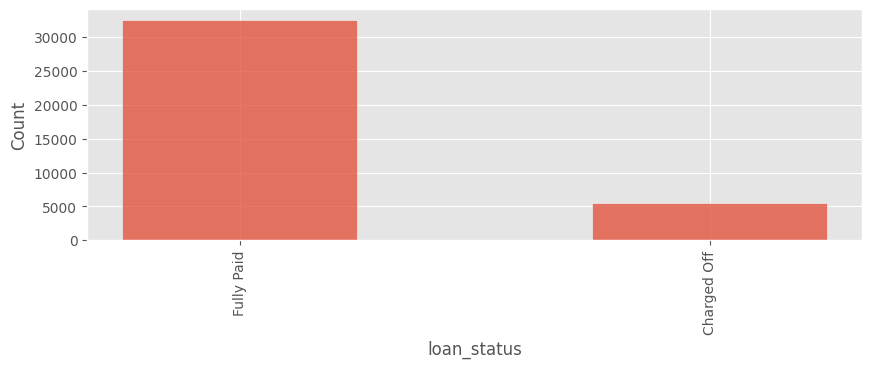

In [33]:
#purpose, sub-grade, home_ownership, verification_status, addr_state, loan_status
plt.figure(figsize=(10,3))
chart = sns.histplot(loan_subset['loan_status'],shrink=0.5)
chart.tick_params(axis='x', rotation=90)
plt.show()

#### Derived column: create new columns based on bins for column int_rate, loan_amount, annual_income and dti

In [34]:
loan_subset['int_rate_norm'].value_counts()
loan_subset['int_rate_norm'].max()

np.float64(24.4)

In [35]:
# Segment the loan amount into ranges
loan_bins = [0, 5000, 10000, 15000, 20000, 25000, loan_subset['loan_amnt'].max()]
loan_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k','25k+']
loan_subset['loan_amnt_range'] = pd.cut(loan_subset['loan_amnt'], bins=loan_bins, labels=loan_labels, include_lowest=True)

# Segment the int rate into ranges
int_rate_bins = [0, 4, 8, 12, 16, 20, loan_subset['int_rate_norm'].max()]
int_rate_labels = ['0-4','4-8', '8-12', '12-16', '16-20', '20+']
loan_subset['int_rate_range'] = pd.cut(loan_subset['int_rate_norm'], bins=int_rate_bins, labels=int_rate_labels, include_lowest=True)

# Segment the annual income into ranges
annual_inc_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, loan_subset['annual_inc'].max()]
annual_inc_labels = ['0-20k', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-120K','120K+',]
loan_subset['annual_inc_range'] = pd.cut(loan_subset['annual_inc'], bins=annual_inc_bins, labels=annual_inc_labels, include_lowest=True)

# Segment the dti into ranges
dti_bins = [0, 1, 3, 6, 9, 12,15,18,21,24,27,loan_subset['dti'].max()]
dti_labels = ['0-1','1-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27','27+']
loan_subset['dti_range'] = pd.cut(loan_subset['dti'], bins=dti_bins, labels=dti_labels, include_lowest=True)

In [36]:
print(loan_subset.shape)
loan_subset.head(3)

(37976, 28)


,id,member_id,annual_inc,dti,emp_length,verification_status,home_ownership,delinq_2yrs,addr_state,loan_amnt,...,term_norm,int_rate_norm,verification_status_norm,home_ownership_norm,grade_norm,loan_status_norm,loan_amnt_range,int_rate_range,annual_inc_range,dti_range
0,1077501,1296599,24000.0,27.65,10+ years,Verified,RENT,0,AZ,5000,...,36,10.65,0,0,1,0,0-5k,8-12,20K-40K,27+
1,1077430,1314167,30000.0,1.00,< 1 year,Source Verified,RENT,0,GA,2500,...,60,15.27,1,0,2,1,0-5k,12-16,20K-40K,0-1
2,1077175,1313524,12252.0,8.72,10+ years,Not Verified,RENT,0,IL,2400,...,36,15.96,2,0,2,0,0-5k,12-16,0-20k,6-9


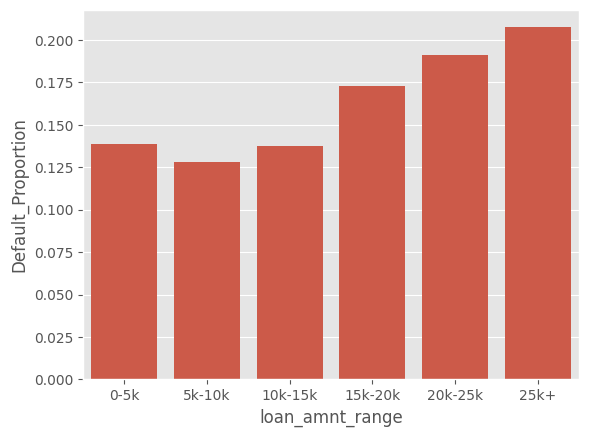

In [37]:
#Lets perform bivaraiante analysis on new range columns 

#loan_amount_range vs loan status
loan_amount_vs_status = loan_subset.groupby(by=['loan_amnt_range','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
loan_amount_vs_status['Default_Proportion'] = loan_amount_vs_status['Charged Off'] /(loan_amount_vs_status['Charged Off']+loan_amount_vs_status['Fully Paid'])
loan_amount_vs_status = loan_amount_vs_status.sort_values('Default_Proportion', ascending=False)
sns.barplot(data=loan_amount_vs_status,x='loan_amnt_range',y='Default_Proportion')
plt.show()

#Observation:
#1. High Loan amount (25k+) has more chance of getting loan default
#2. Low Loan amount (0-5k) has less chance of getting loan default
#3. Loan default increases as loan amount goes high

loan_status int_rate_range  Charged Off  Fully Paid  Default_Proportion
5                      20+          250         420            0.373134
4                    16-20         1208        3213            0.273241
3                    12-16         2136       10215            0.172941
2                     8-12         1444       10895            0.117027
1                      4-8          439        7756            0.053569
0                      0-4            0           0                 NaN


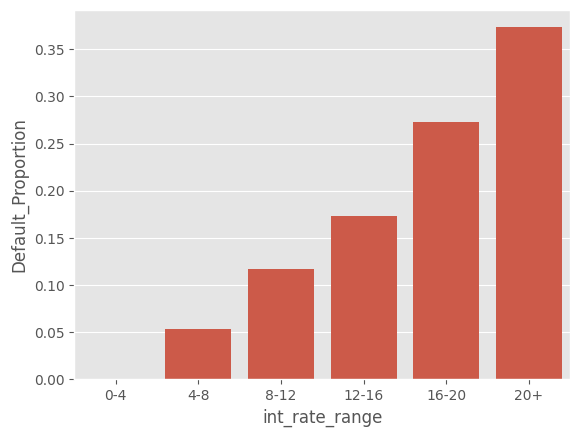

In [38]:
#int_rate_range vs loan status
int_rate_vs_status = loan_subset.groupby(by=['int_rate_range','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
int_rate_vs_status['Default_Proportion'] = int_rate_vs_status['Charged Off'] /(int_rate_vs_status['Charged Off']+int_rate_vs_status['Fully Paid'])
int_rate_vs_status = int_rate_vs_status.sort_values('Default_Proportion', ascending=False)
print(int_rate_vs_status)
sns.barplot(data=int_rate_vs_status,x='int_rate_range',y='Default_Proportion')
plt.show()
#Observation:
#1. Similar to loan amount, the loan default cases are high when interest rate charged on loan are high (i.e 20+)
#2. Low interest rate has low chance of loan default.
#3. Default loan increases in proportion to increase in interest rate

loan_status annual_inc_range  Charged Off  Fully Paid  Default_Proportion
0                      0-20k          237         943            0.200847
1                    20K-40K         1514        7004            0.177741
2                    40K-60K         1723        9525            0.153183
3                    60K-80K          984        6536            0.130851
4                   80K-100K          490        3877            0.112205
6                      120K+          311        2604            0.106690
5                  100K-120K          218        2010            0.097846


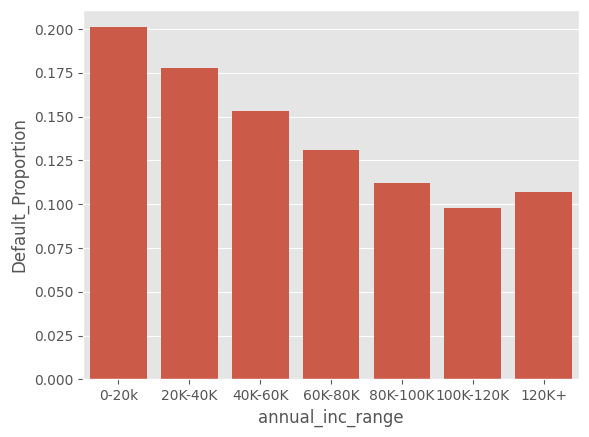

In [39]:
#annual_inc_range vs loan status
annual_inc_vs_status = loan_subset.groupby(by=['annual_inc_range','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
annual_inc_vs_status['Default_Proportion'] = annual_inc_vs_status['Charged Off'] /(annual_inc_vs_status['Charged Off']+annual_inc_vs_status['Fully Paid'])
annual_inc_vs_status = annual_inc_vs_status.sort_values('Default_Proportion', ascending=False)
print(annual_inc_vs_status)
sns.barplot(data=annual_inc_vs_status,x='annual_inc_range',y='Default_Proportion')
plt.show()
#Observation:
#1. Low annual income contibutes to more default case 
#2. High income contributes less to default case
#3. The default case decreases as the annual income increase.

loan_status dti_range  Charged Off  Fully Paid  Default_Proportion
8               21-24          664        3256            0.169388
7               18-21          804        4053            0.165534
9               24-27          215        1122            0.160808
5               12-15          874        4928            0.150638
6               15-18          796        4554            0.148785
4                9-12          724        4690            0.133727
10                27+           41         269            0.132258
1                 1-3          228        1553            0.128018
3                 6-9          595        4072            0.127491
0                 0-1          114         848            0.118503
2                 3-6          422        3154            0.118009


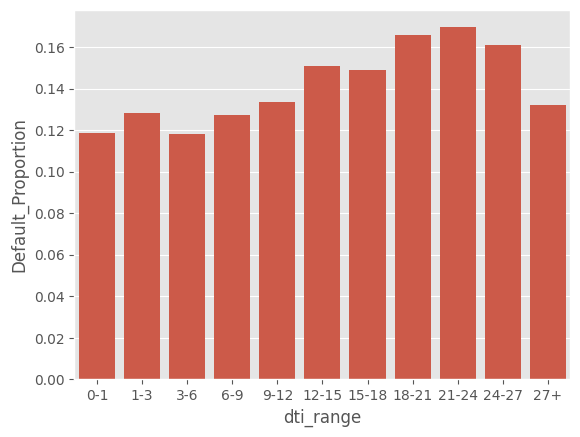

In [40]:
#dti_range vs loan status
dti_vs_status = loan_subset.groupby(by=['dti_range','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
dti_vs_status['Default_Proportion'] = dti_vs_status['Charged Off'] /(dti_vs_status['Charged Off']+dti_vs_status['Fully Paid'])
dti_vs_status = dti_vs_status.sort_values('Default_Proportion', ascending=False)
print(dti_vs_status)
sns.barplot(data=dti_vs_status,x='dti_range',y='Default_Proportion')
plt.show()
#Observation:
#1.Default proportion are high when dti range is b/w 18-27
#2.There is slight varation in default proportion for all dti range 
#3.Nominal impact observed by dti score on loan default

loan_status             purpose  Charged Off  Fully Paid  Default_Proportion
11               small_business          448        1238            0.265718
10             renewable_energy           19          82            0.188119
3                   educational           56         269            0.172308
9                         other          625        3212            0.162888
8                        moving           92         480            0.160839
5                         house           56         298            0.158192
7                       medical          104         574            0.153392
2            debt_consolidation         2682       15041            0.151329
12                     vacation           53         322            0.141333
4              home_improvement          336        2463            0.120043
1                   credit_card          531        4442            0.106777
0                           car          160        1339            0.106738

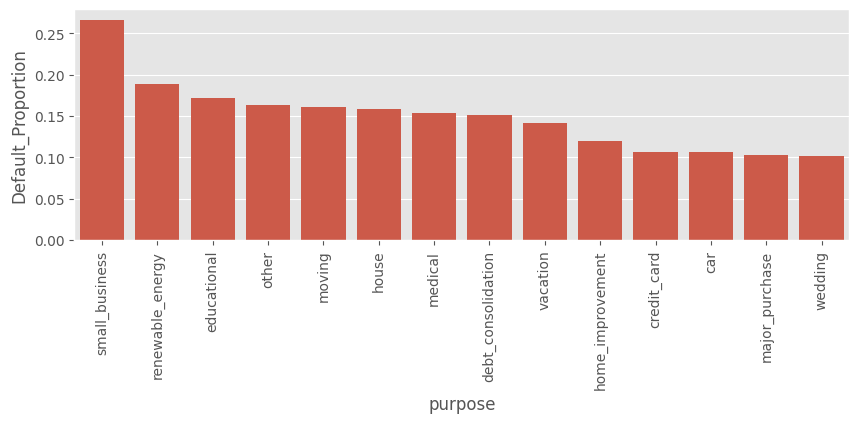

In [41]:
# Bivariate Analysis on purpose of Loan against Charged off_Proportion.
#purpose vs loan status
purpose_vs_status = loan_subset.groupby(by=['purpose','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
purpose_vs_status['Default_Proportion'] = purpose_vs_status['Charged Off'] /(purpose_vs_status['Charged Off']+purpose_vs_status['Fully Paid'])
purpose_vs_status = purpose_vs_status.sort_values('Default_Proportion', ascending=False)
print(purpose_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=purpose_vs_status,x='purpose',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. Small_business loan purpose has high number of default cases, followed by renewable_energy purpose
#2. Car, Credit_card, Major_purchase, Wedding has low default proportion
#3. Nominal effect observed on default loan cases apart from small_business loan purpose 

loan_status grade  Charged Off  Fully Paid  Default_Proportion
6               G           91         181            0.334559
5               F          287         618            0.317127
4               E          672        1847            0.266773
3               D         1093        3891            0.219302
2               C         1326        6403            0.171562
1               B         1407       10159            0.121650
0               A          601        9400            0.060094


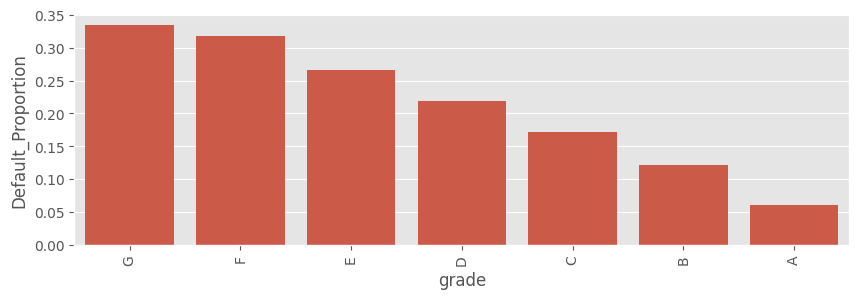

In [42]:
# Bivariate Analysis on Grade against Charged off_Proportion.
#grade vs loan status
grade_vs_status = loan_subset.groupby(by=['grade','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
grade_vs_status['Default_Proportion'] = grade_vs_status['Charged Off'] /(grade_vs_status['Charged Off']+grade_vs_status['Fully Paid'])
grade_vs_status = grade_vs_status.sort_values('Default_Proportion', ascending=False)
print(grade_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=grade_vs_status,x='grade',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. Grade 'G' contributes more to default case
#2. Grade 'A' has least contibution to default case
#3. The efflect of grade to default loan cases increase when grade moves from A to G

loan_status sub_grade  Charged Off  Fully Paid  Default_Proportion
34                 G5           10          17            0.370370
33                 G4           11          39            0.220000
32                 G3           18          25            0.418605
31                 G2           25          43            0.367647
30                 G1           27          57            0.321429
29                 F5           47          54            0.465347
28                 F4           47          96            0.328671
27                 F3           48         113            0.298137
26                 F2           64         156            0.290909
25                 F1           81         199            0.289286
24                 E5           98         259            0.274510
23                 E4          118         279            0.297229
22                 E3          114         376            0.232653
21                 E2          154         432            0.26

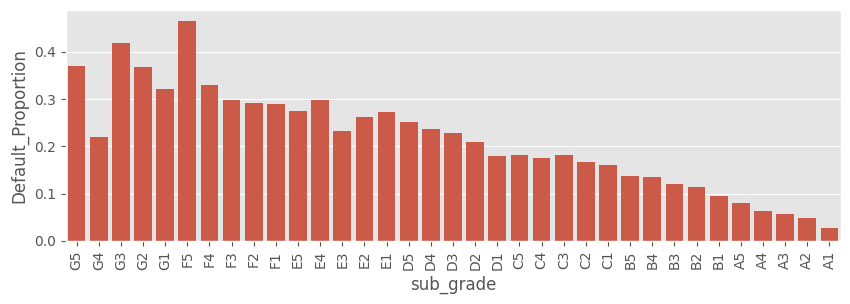

In [43]:
# Bivariate Analysis on Sub_Grade against Charged off_Proportion.
#sub_grade vs loan status
sub_grade_vs_status = loan_subset.groupby(by=['sub_grade','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
sub_grade_vs_status['Default_Proportion'] = sub_grade_vs_status['Charged Off'] /(sub_grade_vs_status['Charged Off']+sub_grade_vs_status['Fully Paid'])
sub_grade_vs_status = sub_grade_vs_status.sort_values('sub_grade', ascending=False)
print(sub_grade_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=sub_grade_vs_status,x='sub_grade',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. Sub grade A contributes less to default cases
#2. Sub grade G and F contributes more to default case
#3. Effect of sub-garde on default case increase as grade moves from A to G

loan_status emp_length  Charged Off  Fully Paid  Default_Proportion
0              0 years          224         799            0.218964
2            10+ years         1266        6994            0.153269
8              7 years          253        1429            0.150416
1               1 year          454        2689            0.144448
6              5 years          447        2700            0.142040
7              6 years          302        1838            0.141121
9              8 years          197        1202            0.140815
11            < 1 year          627        3837            0.140457
4              3 years          542        3418            0.136869
5              4 years          450        2848            0.136446
3              2 years          559        3687            0.131653
10             9 years          156        1058            0.128501


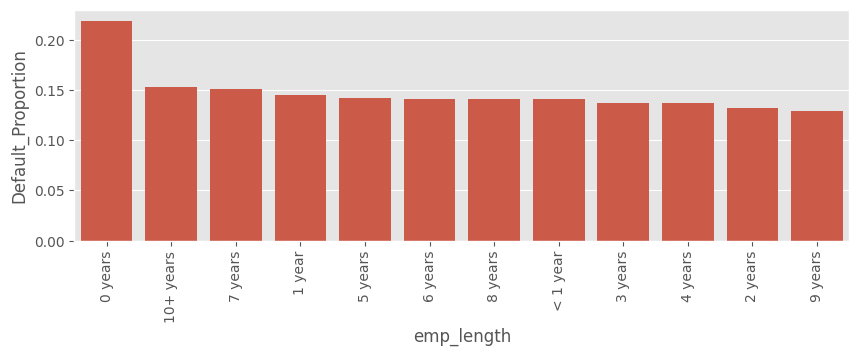

In [44]:
# Bivariate Analysis on emp_length against Charged off_Proportion.
# emp_length vs loan status
emp_length_vs_status = loan_subset.groupby(by=['emp_length','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
emp_length_vs_status['Default_Proportion'] = emp_length_vs_status['Charged Off'] /(emp_length_vs_status['Charged Off']+emp_length_vs_status['Fully Paid'])
emp_length_vs_status = emp_length_vs_status.sort_values('Default_Proportion', ascending=False)
print(emp_length_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=emp_length_vs_status,x='emp_length',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. 0 years contributes more to default case. 
# Here 0 years means no emp_lenght info available for the loan as we have converted the null values in emp_lenght to 0 years
#2. Nominal effect observed on other emp_length on default case.

loan_status addr_state  Charged Off  Fully Paid  Default_Proportion
28                  NE          3.0         2.0            0.600000
32                  NV        103.0       368.0            0.218684
0                   AK         15.0        60.0            0.200000
40                  SD         12.0        50.0            0.193548
9                   FL        494.0      2244.0            0.180424
11                  HI         28.0       136.0            0.170732
24                  MO        112.0       548.0            0.169697
13                  ID          1.0         5.0            0.166667
31                  NM         30.0       152.0            0.164835
36                  OR         71.0       363.0            0.163594
4                   CA       1096.0      5740.0            0.160328
10                  GA        210.0      1132.0            0.156483
20                  MD        156.0       849.0            0.155224
46                  WA        126.0       686.0 

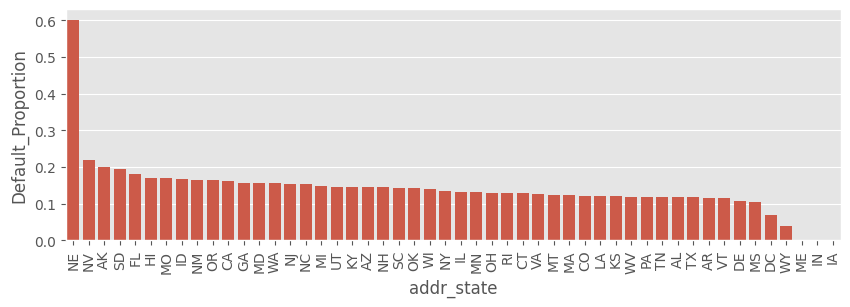

In [45]:
# Bivariate Analysis on addr_state against Charged off_Proportion.
# addr_state vs loan status
addr_state_vs_status = loan_subset.groupby(by=['addr_state','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
addr_state_vs_status['Default_Proportion'] = addr_state_vs_status['Charged Off'] /(addr_state_vs_status['Charged Off']+addr_state_vs_status['Fully Paid'])
addr_state_vs_status = addr_state_vs_status.sort_values('Default_Proportion', ascending=False)
print(addr_state_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=addr_state_vs_status,x='addr_state',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. 'NE' state contributes more to default cases but number of application are very less. So we will ignore NE.
#2. Nill default case observed on state ME, IN, IA, but again less number of application
#3. 'NV', 'FL' and 'CA' state has more number of default loan case compared with total loan application

loan_status verification_status  Charged Off  Fully Paid  Default_Proportion
2                      Verified         1922        9793            0.164063
1               Source Verified         1413        8158            0.147633
0                  Not Verified         2142       14548            0.128340


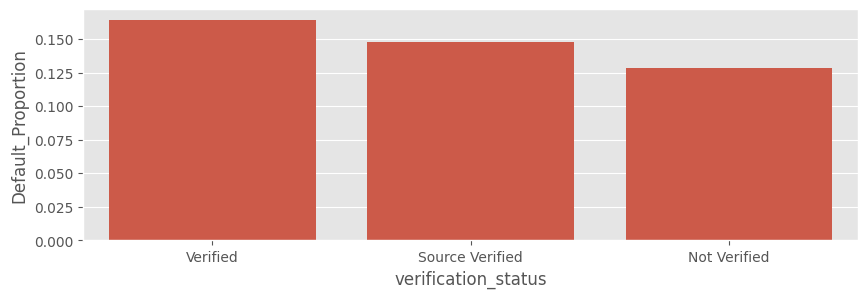

In [46]:
# Bivariate Analysis on verification_status against Charged off_Proportion.
# verification_status vs loan status
verification_vs_status = loan_subset.groupby(by=['verification_status','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
verification_vs_status['Default_Proportion'] = verification_vs_status['Charged Off'] /(verification_vs_status['Charged Off']+verification_vs_status['Fully Paid'])
verification_vs_status = verification_vs_status.sort_values('Default_Proportion', ascending=False)
print(verification_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=verification_vs_status,x='verification_status',y='Default_Proportion')
#plt.xticks(rotation=90)
plt.show()
#Observation:
#1. Verified status has more number of default case
#2. All 2 status has almost equal effect on the default case.

loan_status  delinq_2yrs  Charged Off  Fully Paid  Default_Proportion
8                      8          1.0         1.0            0.500000
7                      7          1.0         3.0            0.250000
4                      4         13.0        46.0            0.220339
2                      2        125.0       538.0            0.188537
3                      3         34.0       176.0            0.161905
1                      1        489.0      2659.0            0.155337
5                      5          3.0        18.0            0.142857
0                      0       4810.0     29047.0            0.142068
6                      6          1.0         9.0            0.100000
9                      9          0.0         1.0            0.000000
10                    11          0.0         1.0            0.000000


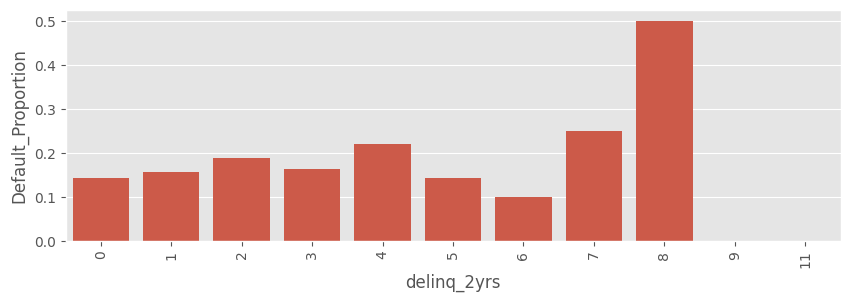

In [47]:
# Bivariate Analysis on delinq_2yrs against Charged off_Proportion.
# delinq_2yrs vs loan status
delinq_2yrs_vs_status = loan_subset.groupby(by=['delinq_2yrs','loan_status']).loan_status_norm.count().unstack().fillna(0).reset_index()
delinq_2yrs_vs_status['Default_Proportion'] = delinq_2yrs_vs_status['Charged Off'] /(delinq_2yrs_vs_status['Charged Off']+delinq_2yrs_vs_status['Fully Paid'])
delinq_2yrs_vs_status = delinq_2yrs_vs_status.sort_values('Default_Proportion', ascending=False)
print(delinq_2yrs_vs_status)
plt.figure(figsize=(10,3))
sns.barplot(data=delinq_2yrs_vs_status,x='delinq_2yrs',y='Default_Proportion')
plt.xticks(rotation=90)
plt.show()
#Observation:
#1. when delinq_2yrs=1, high chance of loan default commpared to delinq_2yr=0
#2. As delinq_2yrs beyond 1 year, the default cases also increase. This the applicant who has defaulted before has more chance of loan default case.

In [48]:
loan_subset.columns

Index(['id', 'member_id', 'annual_inc', 'dti', 'emp_length',
       'verification_status', 'home_ownership', 'delinq_2yrs', 'addr_state',
       'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'purpose', 'loan_status', 'emp_length_norm', 'term_norm',
       'int_rate_norm', 'verification_status_norm', 'home_ownership_norm',
       'grade_norm', 'loan_status_norm', 'loan_amnt_range', 'int_rate_range',
       'annual_inc_range', 'dti_range'],
      dtype='object')

#### Bivariate Analysis
Columns in loan_subset dataframe are:
        'id', 'member_id', **'annual_inc'**, **'dti'**, 'emp_length',
        'verification_status', 'home_ownership', 'delinq_2yrs', **'addr_state'**,
        **'loan_amnt'**, **term'**, **'int_rate'**, 'installment', **'grade'**, 'sub_grade',
        **'purpose'**, 'loan_status', 'emp_length_norm', 'term_norm',
        'int_rate_norm', 'verification_status_norm', 'home_ownership_norm',
        'grade_norm', 'loan_status_norm', 'loan_amnt_range', 'int_rate_range',
        'annual_inc_range', 'dti_range'

Lets perform Bivariate Analysis b/w below mentioned columns to understand relation and find out hidden info in them:

**Does the purpose of loan effects the loan amount disbursed and interest rate applied on them?**
> 1. purpose vs loan_amnt
> 2. purpose vs int_rate
   
**Does long term has any effect on the int_rate?**
> 3. term vs int_rate

**Does loan amount determines the int_rate?**
> 4. loan_amnt vs int_rate

**How dti is distributed among the int_rate?**
> 5. dti vs int_rate

**How Grades are distributed among annual income and addr_state?**
> 6. grade vs annual_inc

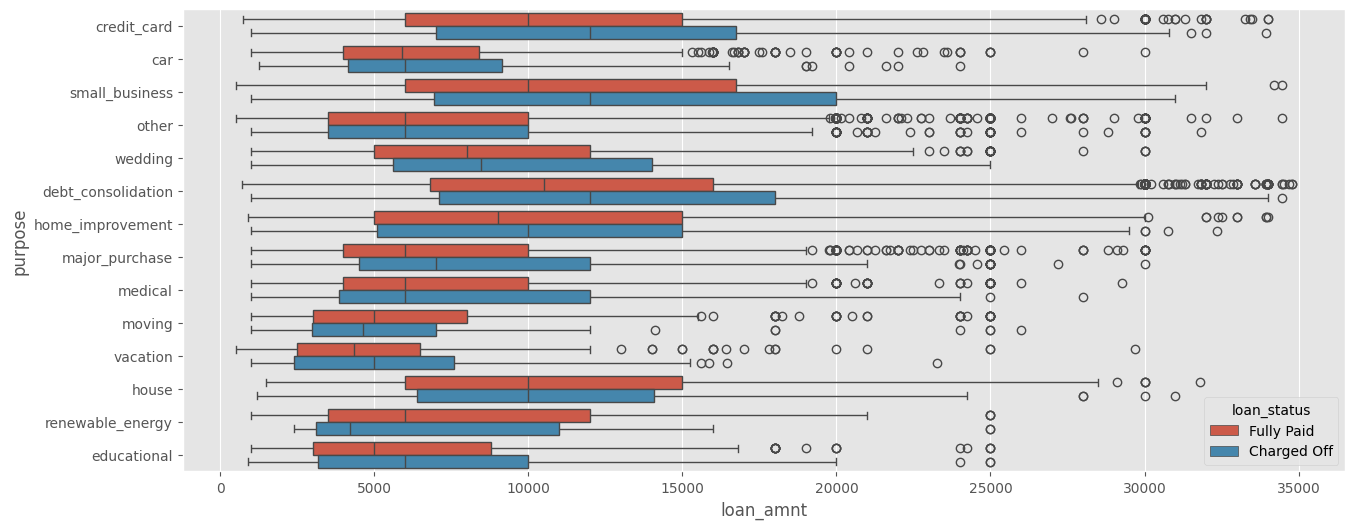

In [49]:
#1. purpose vs loan_amnt
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_subset, x='loan_amnt', y='purpose', hue='loan_status')
plt.show()

#Observation:
# 1. Loan pupose 'debt_consolidation', 'small_business', 'credit_card' are having same median and contributes more to the charged off cases

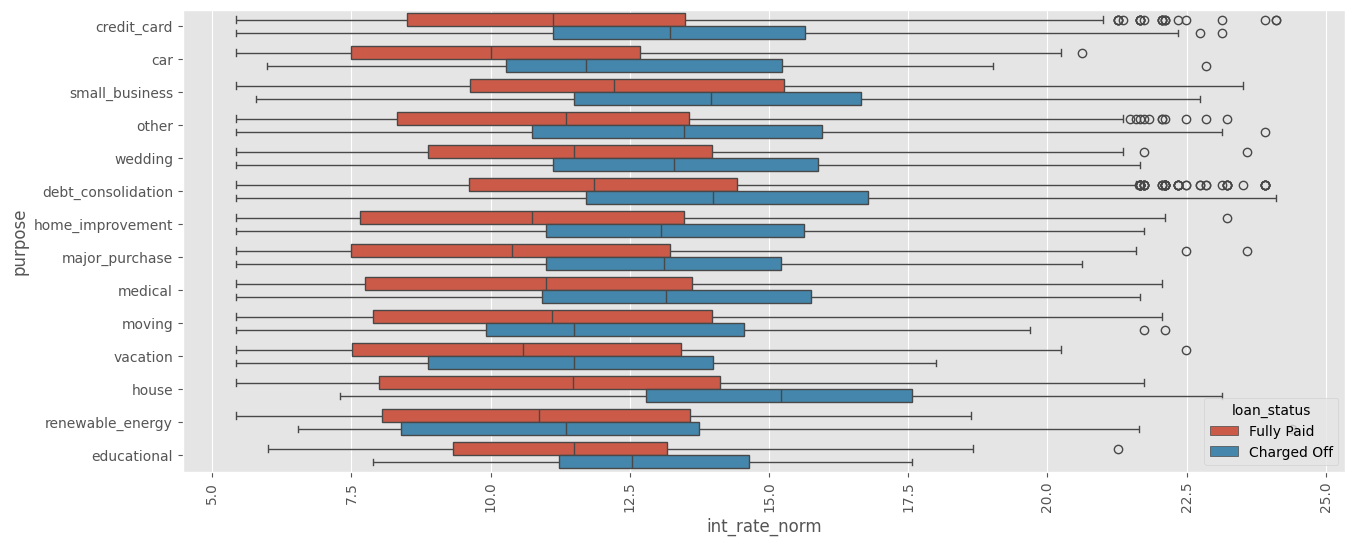

In [50]:
#2. purpose vs int_rate
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_subset, x='int_rate_norm', y='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#Observation:
#1. High int rate charged on home purpose contrbuted to more charged off
#2. High interest are charged on debt_consolidation and small_business purpose

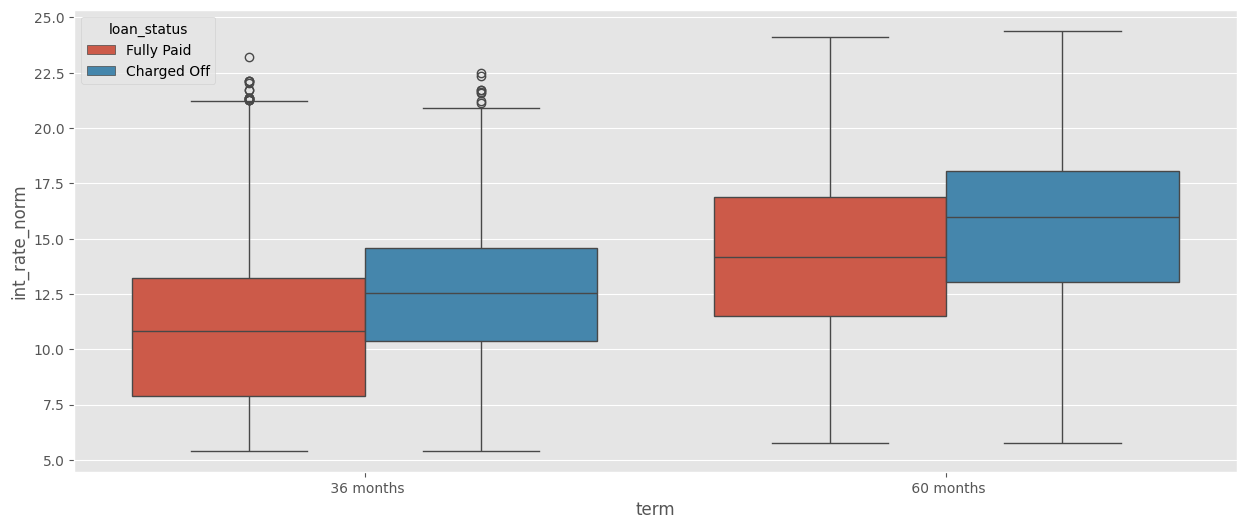

In [51]:
#3. term vs int_rate
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_subset, x='term', y='int_rate_norm', hue='loan_status')
plt.show()

#Observation:
#1. Int_rate on 60 month loan term are high 

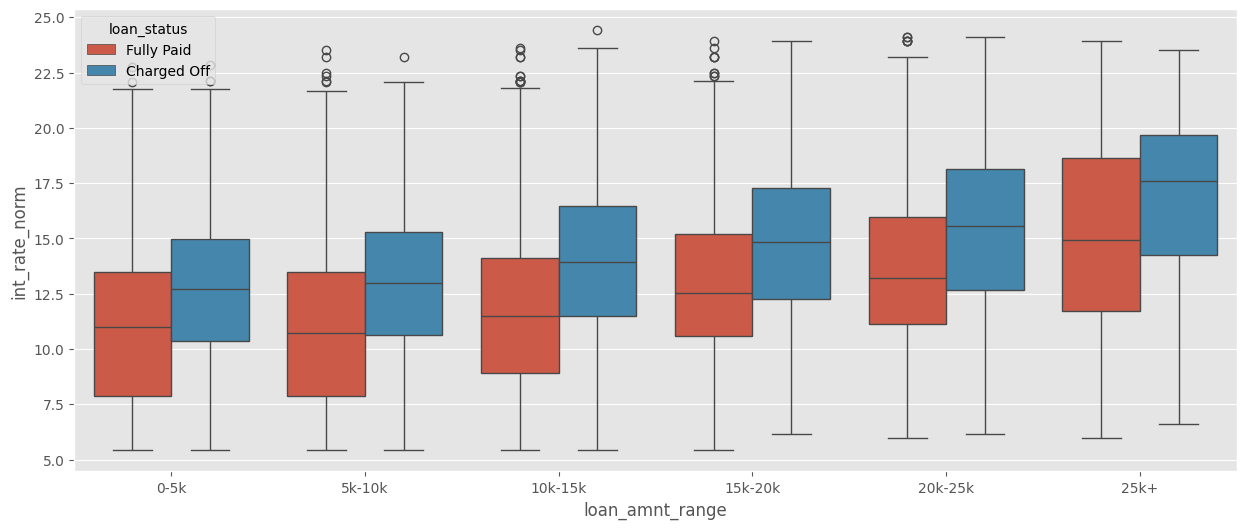

In [52]:
#4. loan_amnt vs int_rate
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_subset, x='loan_amnt_range', y='int_rate_norm', hue='loan_status')
plt.show()

#Observation:
#1. For high loan amount, the interest rates are always high compared to small loan amount.

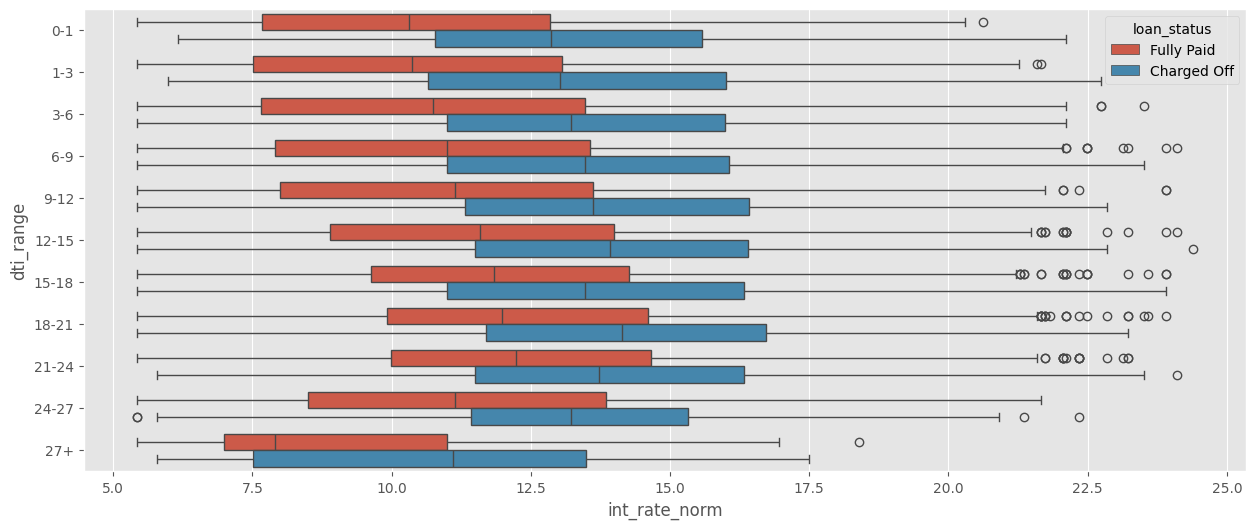

In [53]:
#5. dti vs int_rate
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_subset, x='int_rate_norm', y='dti_range', hue='loan_status')
plt.show()

#Observation:
#1. Lower DTI represents lower risk. 
#2. For dti score less that 24, the average int_rate falls b/w 10%-12.5%
#3. For all dti score having int_rate more than 75-percentile, the charged off cases increase drastically

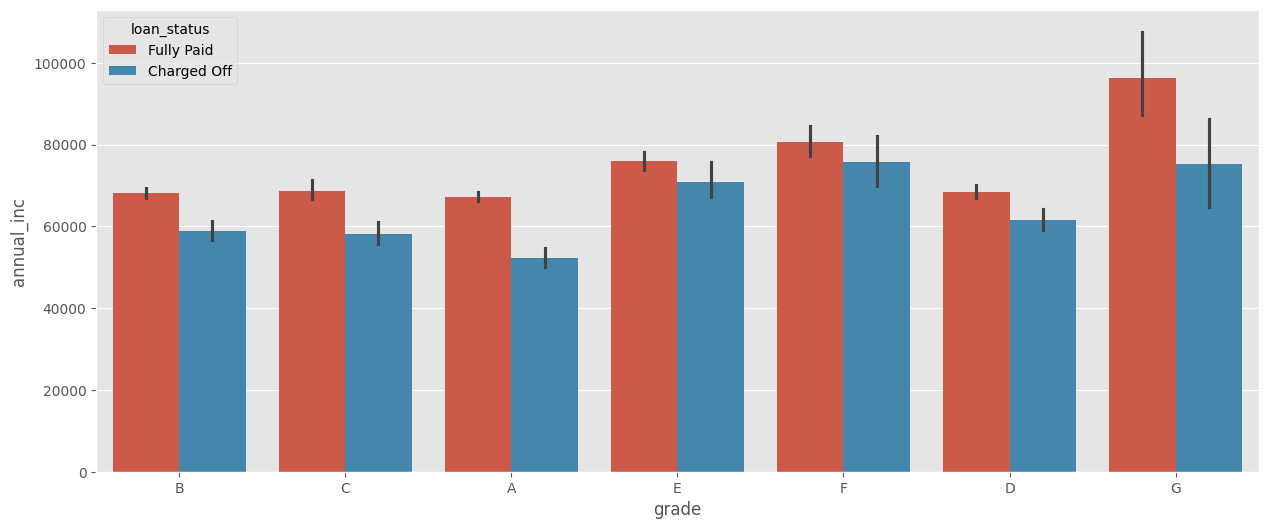

In [54]:
#grade vs annual_inc
plt.figure(figsize=(15,6))
sns.barplot(data=loan_subset, x='grade', y='annual_inc', hue='loan_status')
plt.show()

#Observation:
#1. Charged off loans are having Lower income for across all grade  

#### so far, below are the summary of observation:
1. Loan default increases as loan amount goes high
2. Default loan increases in proportion to increase in interest rate
3. The default case decreases as the annual income increase.
4. Nominal impact observed by dti score on loan default
5. Small_business loan purpose has high number of default cases, followed by renewable_energy purpose
6. The efflect of grade to default loan cases increase when grade moves from A to G
7. 0 years contributes more to default case. 
8. 'NV', 'FL' and 'CA' state has more number of default loan case compared with total loan application
9. All 2 status has almost equal effect on the default case.
10. As delinq_2yrs goes beyond 0, the default chance increases

### Multivariate analysis between important columns
From above summary of observations, we will consider loan_amnt, int_rate, annual_inc, dti, grade_norm, emp_length_norm, delinq_2yrs, loan_status 

In [55]:
loan_pair = loan_subset[['loan_amnt', 'int_rate_norm', 'annual_inc', 'grade_norm','loan_status_norm']]
loan_pair.head(3)

,loan_amnt,int_rate_norm,annual_inc,grade_norm,loan_status_norm
0,5000,10.65,24000.0,1,0
1,2500,15.27,30000.0,2,1
2,2400,15.96,12252.0,2,0


In [56]:
dfs_corr = loan_pair.corr(method='pearson')

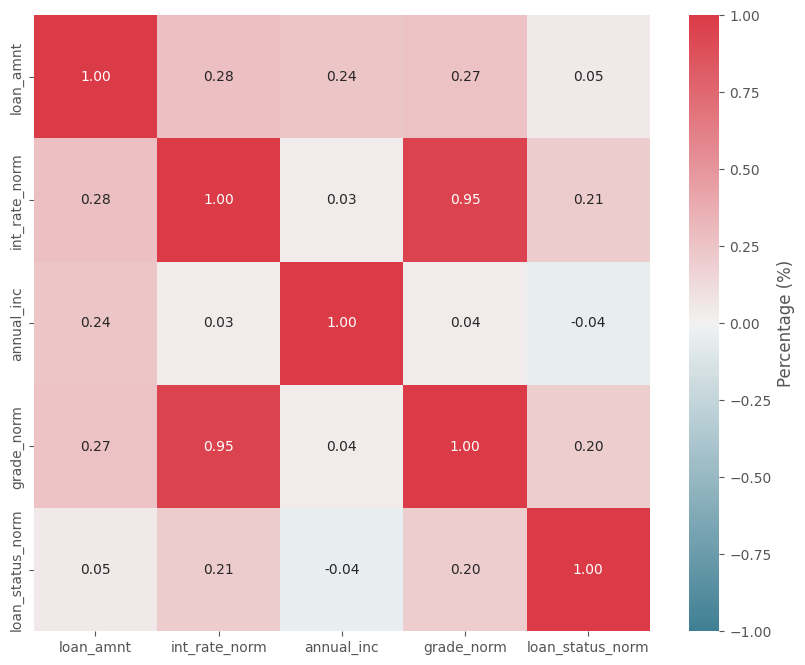

In [57]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfs_corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,
           annot=True,fmt='.2f', cbar_kws={'label': 'Percentage (%)'})
plt.show()

### Recommendation
1. Applicants with **Low annual income** (-0.07), **Low grades** (0.15), a history of **delinquency** are more likely to default.
2. Offering a **high-interest rate** (0.92) to applicants with **low grades** increases the likelihood of default.